In [1]:
import gudhi as gd
import pandas as pd
from scipy.spatial import distance
import numpy as np
from sklearn.manifold import TSNE, Isomap
import matplotlib.pyplot as plt
import kmapper as km
from sklearn.cluster import KMeans
from kmapper.jupyter import display
from sklearn.decomposition import PCA
import umap
from kmapper.plotlyviz import plotlyviz
from sklearn.manifold import MDS


In [2]:
ebola_genome_data = pd.read_feather("data/ebola_obs.feather")
ebola_genome_lab_data = pd.read_feather("data/ebola_lab.feather")

In [3]:
ebola_genome_data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X26436,X26437,X26438,X26439,X26440,X26441,X26442,X26443,X26444,X26445
0,NaN,NaN,NaN,NaN,3.0,1.0,3.0,1.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,4.0,4.0,1.0,3.0,1.0,3.0,1.0,3.0,1.0,...,2.0,4.0,2.0,4.0,2.0,4.0,2.0,3.0,3.0,1.0
2,3.0,4.0,4.0,1.0,3.0,1.0,3.0,1.0,3.0,1.0,...,2.0,4.0,2.0,4.0,2.0,4.0,2.0,3.0,3.0,1.0
3,3.0,4.0,4.0,1.0,3.0,1.0,3.0,1.0,3.0,1.0,...,2.0,4.0,2.0,4.0,2.0,4.0,2.0,3.0,3.0,NaN
4,3.0,4.0,4.0,1.0,3.0,1.0,3.0,1.0,3.0,1.0,...,2.0,4.0,2.0,4.0,2.0,4.0,2.0,3.0,3.0,NaN


In [7]:
ebola_genome_data.iloc[0].unique()

array([nan,  3.,  1.,  4.,  2.])

In [96]:
ebola_genome_lab_data.head()

,ebola.lab
0,Cue-bat
1,Bun-hum
2,Bun-hum
3,Bun-hum
4,Res-mon


In [8]:
virus_types = {'bun': 0, 'sud': 1, 'tai': 2, 'zai': 3, 'res':4, 'cue': 5, 'mar': 6}
virus_display = ['Bundibugyo virus', 'Sudan ebolavirus', 'Tai Forest ebolavirus', 'Zaire ebolavirus', 'Reston ebolavirus', 'Cuevavirus', 'Marburgvirus']

In [9]:
def virus_type_to_class(type_and_species):
    type_and_species = type_and_species.lower()
    for virus, class_num in virus_types.items():
        if virus in type_and_species:
            return class_num
    print(type_and_species)
    raise ValueError()

In [10]:
ebola_genome_lab_data = ebola_genome_lab_data.applymap(virus_type_to_class)
ebola_genome_lab_data.head()

,ebola.lab
0,5
1,0
2,0
3,0
4,4


In [11]:
ebola_genome_lab_data.value_counts()

ebola.lab
3            64
6            22
1             6
4             5
0             3
2             2
5             1
dtype: int64

In [12]:
def calculate_distance_matrix(data, metric):
    n = len(data)
    distances = np.zeros((n,n))

    for i in range(n):
        for j in range(i,n):
            distance = metric(data[i], data[j])
            distances[i][j], distances[j][i] = distance, distance
    
    return distances

In [13]:
ebola_genome_data_np = ebola_genome_data.to_numpy()
ebola_genome_data_np

array([[nan, nan, nan, ..., nan, nan, nan],
       [ 3.,  4.,  4., ...,  3.,  3.,  1.],
       [ 3.,  4.,  4., ...,  3.,  3.,  1.],
       ...,
       [nan, nan,  4., ...,  3.,  3.,  1.],
       [nan, nan,  4., ...,  3.,  3.,  1.],
       [nan,  1.,  4., ...,  3.,  3., nan]])

In [14]:
X = calculate_distance_matrix(ebola_genome_data_np, distance.hamming)
X

array([[0.28428815, 0.67517489, 0.67517489, ..., 0.73091322, 0.73095103,
        0.73189639],
       [0.67517489, 0.28379656, 0.28379656, ..., 0.71695973, 0.71699754,
        0.71745131],
       [0.67517489, 0.28379656, 0.28379656, ..., 0.71695973, 0.71699754,
        0.71745131],
       ...,
       [0.73091322, 0.71695973, 0.71695973, ..., 0.27725468, 0.27789752,
        0.32055209],
       [0.73095103, 0.71699754, 0.71699754, ..., 0.27789752, 0.27729249,
        0.32021176],
       [0.73189639, 0.71745131, 0.71745131, ..., 0.32055209, 0.32021176,
        0.27733031]])

In [77]:
tsne_solver = TSNE(n_components=2, metric='precomputed', init='random')
tsne_embeddings = tsne_solver.fit_transform(X)
print('KL Divergence:', tsne_solver.kl_divergence_)
print(tsne_embeddings[:5])

KL Divergence: 0.18096281588077545
[[ 0.31883144  0.37137914]
 [ 0.8577513  -0.08645966]
 [ 0.85861284 -0.08428638]
 [ 0.8631785  -0.08845893]
 [ 0.39335173  2.1171193 ]]


/var/folders/vp/7cb3bs4171vd6ywq0xgznpbh0000gn/T/ipykernel_51211/1677630674.py:6: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



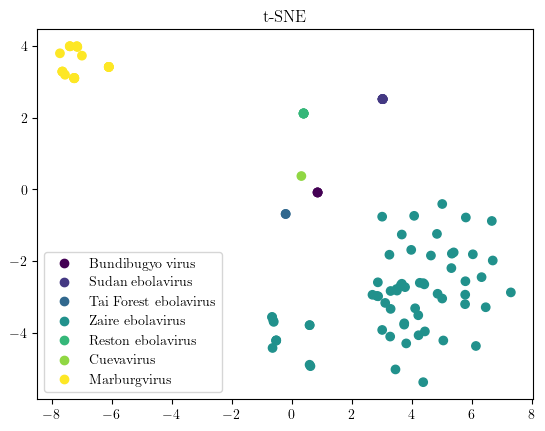

In [78]:
fig = plt.figure()
ax = fig.add_subplot()
scatter = ax.scatter(tsne_embeddings[:,0], tsne_embeddings[:,1], c=ebola_genome_lab_data.to_numpy())
ax.legend(handles=scatter.legend_elements()[0], labels=virus_display)
ax.set_title("t-SNE")
fig.show()

In [16]:
classes = ebola_genome_lab_data.to_numpy().flatten()

In [40]:
mapper = km.KeplerMapper()
projected_X = mapper.fit_transform(X, projection=[TSNE(random_state=1)])
simplicial_complex = mapper.map(projected_X, X, cover=km.Cover(n_cubes=15, perc_overlap=0.5))
_ = mapper.visualize(simplicial_complex, path_html='viral_genome_graph_tsne.html', custom_tooltips=classes)


In [41]:
plotlyviz(simplicial_complex, title="Topological Network Representing Ebola Genome Data", graph_layout='fr')

AttributeError: type object 'DOMWidget' has no attribute '_ipython_display_'

FigureWidget({
    'data': [{'hoverinfo': 'none',
              'line': {'color': 'rgb(180,180,180)', 'width': 1.5},
              'mode': 'lines',
              'type': 'scatter',
              'uid': 'd5cd9dbd-7924-44f0-bfbf-c65cfea9f969',
              'x': [2.879539801928139, 3.333837737146109, None, 2.879539801928139,
                    3.585429583152692, None, 2.879539801928139, 2.469580510824071,
                    None, 3.333837737146109, 3.387475530134996, None,
                    3.333837737146109, 3.585429583152692, None, 3.333837737146109,
                    2.469580510824071, None, 3.333837737146109, 2.3904930255012795,
                    None, 3.387475530134996, 2.469580510824071, None,
                    3.387475530134996, 2.3904930255012795, None, 3.585429583152692,
                    2.469580510824071, None, 2.469580510824071, 2.3904930255012795,
                    None, 2.469580510824071, 1.1828048811837026, None,
                    2.469580510824071, 1.3469760450759354, None,
                    2.3904930255012795, 1.1828048811837026, None,
                    2.3904930255012795, 1.3469760450759354, None,
                    1.1828048811837026, 1.3469760450759354, None,
                    1.1828048811837026, 0.16497539123466523, None,
                    1.1828048811837026, 0.4210346803118928, None,
                    1.3469760450759354, 0.16497539123466523, None,
                    1.3469760450759354, 0.4210346803118928, None,
                    0.16497539123466523, 0.4210346803118928, None,
                    0.4210346803118928, 0.49201052983080384, None,
                    0.49201052983080384, 1.4769587832940718, None,
                    1.4769587832940718, 2.622202268968104, None, 2.622202268968104,
                    3.3373679218759693, None, 2.622202268968104,
                    3.6278881165426613, None, 3.3373679218759693,
                    3.6278881165426613, None, -4.330940489564358,
                    -4.933108470700456, None, -4.330940489564358,
                    -3.803941583361564, None, -4.330940489564358,
                    -4.4573688270894705, None, -4.933108470700456,
                    -3.803941583361564, None, -4.933108470700456,
                    -4.4573688270894705, None, -3.803941583361564,
                    -4.4573688270894705, None, 0.22437307686502925,
                    -0.4412820468664679, None, 0.22437307686502925,
                    0.6790090437771229, None, 0.22437307686502925,
                    -0.009902240393820207, None, -2.417520253072692,
                    -2.4018166472817284, None, -2.417520253072692,
                    -3.197016799787788, None, -2.417520253072692,
                    -3.16402671273873, None, -0.4412820468664679,
                    0.6790090437771229, None, -0.4412820468664679,
                    -0.009902240393820207, None, -2.4018166472817284,
                    -3.197016799787788, None, -2.4018166472817284,
                    -3.16402671273873, None, -3.621997675592923,
                    -4.3598154506004105, None, -3.621997675592923,
                    -4.02209466075244, None, -3.621997675592923,
                    -3.304350543054961, None, -2.7131340923680596,
                    -2.1764178624847514, None, -4.3598154506004105,
                    -4.02209466075244, None, -4.3598154506004105,
                    -3.304350543054961, None, 0.6790090437771229,
                    -0.009902240393820207, None, -3.197016799787788,
                    -3.16402671273873, None, 0.7124546870011361,
                    0.3723470993128543, None, 0.7124546870011361,
                    -0.35508628929849223, None, 0.7124546870011361,
                    -0.033325498781618175, None, 0.3723470993128543,
                    -0.35508628929849223, None, 0.3723470993128543,
                    -0.033325498781618175, None, -4.02209466075244,
                    -3.304350543054961, None, -0.35508628929849223,
                    -0.

In [54]:
mapper = km.KeplerMapper()
projected_X = mapper.fit_transform(X, projection=[TSNE(random_state=1)])
simplicial_complex = mapper.map(projected_X, X, cover=km.Cover(n_cubes=7, perc_overlap=0.5), clusterer=KMeans(n_clusters=1))
_ = mapper.visualize(simplicial_complex, path_html='viral_genome_graph_tsne_kmeans.html', custom_tooltips=classes)

/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change fro

/var/folders/vp/7cb3bs4171vd6ywq0xgznpbh0000gn/T/ipykernel_3078/3374276112.py:6: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



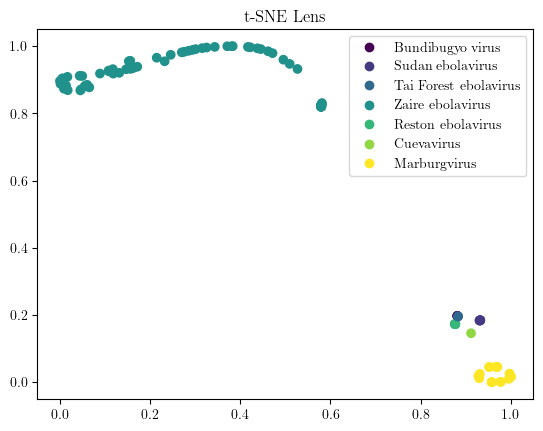

In [112]:
fig = plt.figure()
ax = fig.add_subplot()
scatter = ax.scatter(projected_X[:,0], projected_X[:,1], c=ebola_genome_lab_data.to_numpy())
ax.legend(handles=scatter.legend_elements()[0], labels=virus_display)
ax.set_title("t-SNE Lens")
fig.show()

In [55]:
plotlyviz(simplicial_complex, title="Topological Network Representing Ebola Genome Data", graph_layout='fr')

AttributeError: type object 'DOMWidget' has no attribute '_ipython_display_'

FigureWidget({
    'data': [{'hoverinfo': 'none',
              'line': {'color': 'rgb(180,180,180)', 'width': 1.5},
              'mode': 'lines',
              'type': 'scatter',
              'uid': '73a12306-114d-41ce-acda-06e5da1256ab',
              'x': [0.4670681985988484, 0.28463950680207045, None,
                    0.4670681985988484, 1.2263212176619445, None,
                    0.4670681985988484, 1.1731138815120807, None,
                    0.28463950680207045, 1.2263212176619445, None,
                    0.28463950680207045, 1.1731138815120807, None,
                    1.2263212176619445, 1.1731138815120807, None,
                    1.1731138815120807, 1.7425748004791999, None,
                    1.7425748004791999, 1.4398256773199356, None,
                    0.6499347776992644, 1.4398256773199356, None,
                    0.6499347776992644, 1.6807192937204458, None,
                    0.6499347776992644, 0.9832891635096948, None,
                    1.4398256773199356, 1.6807192937204458, None,
                    1.4398256773199356, 0.9832891635096948, None,
                    1.6807192937204458, 0.9832891635096948, None,
                    -2.089277443265502, -2.5212540129799, None, -2.089277443265502,
                    -1.9642754989403721, None, -2.089277443265502,
                    -1.5265691673069939, None, -2.5212540129799,
                    -1.9642754989403721, None, -2.5212540129799,
                    -1.5265691673069939, None, -1.9642754989403721,
                    -1.5265691673069939, None],
              'y': [-2.6635174553172885, -1.9695076185460414, None,
                    -2.6635174553172885, -2.4720914647665153, None,
                    -2.6635174553172885, -1.6152021436506234, None,
                    -1.9695076185460414, -2.4720914647665153, None,
                    -1.9695076185460414, -1.6152021436506234, None,
                    -2.4720914647665153, -1.6152021436506234, None,
                    -1.6152021436506234, -0.4747799757212752, None,
                    -0.4747799757212752, 0.7636159101095152, None,
                    1.3064942316807129, 0.7636159101095152, None,
                    1.3064942316807129, 1.586666525852198, None,
                    1.3064942316807129, 1.9420988780491804, None,
                    0.7636159101095152, 1.586666525852198, None,
                    0.7636159101095152, 1.9420988780491804, None,
                    1.586666525852198, 1.9420988780491804, None,
                    -0.6667885635645583, -0.012088853214585395, None,
                    -0.6667885635645583, 0.5439418187591291, None,
                    -0.6667885635645583, -0.11216875067899573, None,
                    -0.012088853214585395, 0.5439418187591291, None,
                    -0.012088853214585395, -0.11216875067899573, None,
                    0.5439418187591291, -0.11216875067899573, None]},
             {'hoverinfo': 'text',
              'marker': {'color': [0.36274509803921573, 0.3992562542258283,
                                   0.4313725490196078, 0.5285947712418301,
                                   0.6489262371615312, 0.30800653594771243,
                                   0.5118464052287582, 0.30800653594771243,
                                   0.37324929971988796, 0.18250377073906485,
                                   0.059714795008912656, 0.5402212166918048,
                                   0.07843137254901962],
                         'colorbar': {'thickness': 20, 'tickfont': {'size': 10}, 'ticklen': 4, 'x': 1.01},
                         'colorscale': [[0.0, 'rgb(68, 1, 84)'], [0.1, 'rgb(72,
                                        35, 116)'], [0.2, 'rgb(64, 67, 135)'],
                                        [0.3, 'rgb(52, 94, 141)'], [0.4, 'rgb(41,
                                        120, 142)'], [0.5, 'rgb(32, 144, 140)'],
                                        [0.6, 'rgb(34, 167, 132)'], [0.7, 'rgb(68,
                     

In [ ]:
mapper = km.KeplerMapper()
projected_X = mapper.fit_transform(X, projection=[umap.UMAP(n_neighbors=10)])
simplicial_complex = mapper.map(projected_X, X)
_ = mapper.visualize(simplicial_complex, path_html='viral_genome_graph_umap.html', custom_tooltips=ebola_genome_data_np)

OMP: Info #273: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


: 

: 

/var/folders/vp/7cb3bs4171vd6ywq0xgznpbh0000gn/T/ipykernel_58952/1763498249.py:6: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



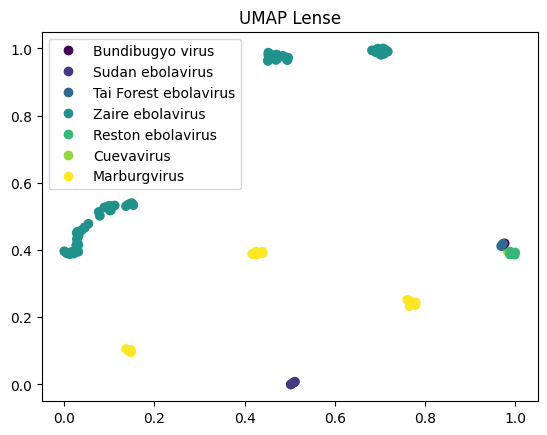

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
scatter = ax.scatter(projected_X[:,0], projected_X[:,1], c=ebola_genome_lab_data.to_numpy())
ax.legend(handles=scatter.legend_elements()[0], labels=virus_display)
ax.set_title("UMAP Lens")
fig.show()

In [ ]:
mapper = km.KeplerMapper()
projected_X = mapper.fit_transform(X, projection=[umap.UMAP(n_neighbors=10)])
simplicial_complex = mapper.map(projected_X, X, clusterer=KMeans(n_clusters=2))
_ = mapper.visualize(simplicial_complex, path_html='viral_genome_graph_umap_kmeans.html', custom_tooltips=ebola_genome_data_np)

In [ ]:
mapper = km.KeplerMapper()
projected_X = mapper.fit_transform(X, projection=[Isomap()])
simplicial_complex = mapper.map(projected_X, X)
_ = mapper.visualize(simplicial_complex, path_html='viral_genome_graph_isomap.html')

/var/folders/vp/7cb3bs4171vd6ywq0xgznpbh0000gn/T/ipykernel_58952/1563739533.py:6: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



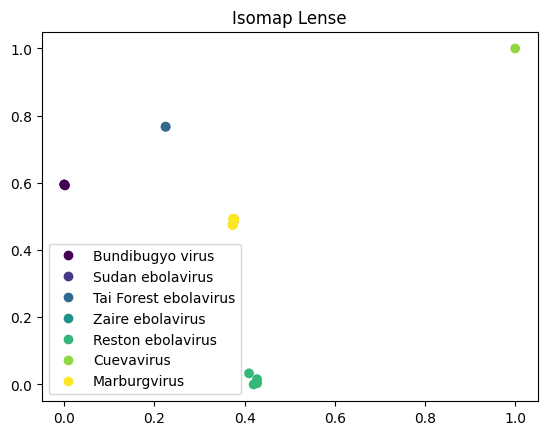

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
scatter = ax.scatter(projected_X[:,0], projected_X[:,1], c=ebola_genome_lab_data.to_numpy())
ax.legend(handles=scatter.legend_elements()[0], labels=virus_display)
ax.set_title("Isomap Lense")
fig.show()

In [ ]:
plotlyviz(simplicial_complex, title="Topological Network Representing Ebola Genome Data", graph_layout='fr')

AttributeError: type object 'DOMWidget' has no attribute '_ipython_display_'

FigureWidget({
    'data': [{'hoverinfo': 'none',
              'line': {'color': 'rgb(180,180,180)', 'width': 1.5},
              'mode': 'lines',
              'type': 'scatter',
              'uid': '10f6fda9-98f8-4b9d-81e1-4e35c0b436b8',
              'x': [],
              'y': []},
             {'hoverinfo': 'text',
              'marker': {'color': [0.0196078431372549, 0.11274509803921569,
                                   0.4754901960784314, 0.8294117647058824,
                                   0.916955017301038, 0.0588235294117647],
                         'colorbar': {'thickness': 20, 'tickfont': {'size': 10}, 'ticklen': 4, 'x': 1.01},
                         'colorscale': [[0.0, 'rgb(68, 1, 84)'], [0.1, 'rgb(72,
                                        35, 116)'], [0.2, 'rgb(64, 67, 135)'],
                                        [0.3, 'rgb(52, 94, 141)'], [0.4, 'rgb(41,
                                        120, 142)'], [0.5, 'rgb(32, 144, 140)'],
                                        [0.6, 'rgb(34, 167, 132)'], [0.7, 'rgb(68,
                                        190, 112)'], [0.8, 'rgb(121, 209, 81)'],
                                        [0.9, 'rgb(189, 222, 38)'], [1.0, 'rgb(253,
                                        231, 36)']],
                         'line': {'color': 'rgb(200,200,200)', 'width': 1.0},
                         'opacity': 1.0,
                         'showscale': True,
                         'size': [6, 6, 15, 6, 9, 6]},
              'mode': 'markers',
              'text': [cube0_cluster0, cube3_cluster0, cube3_cluster1,
                       cube3_cluster2, cube3_cluster3, cube4_cluster0],
              'type': 'scatter',
              'uid': '0e296c8c-5550-4a03-bb76-132c6d42feb5',
              'x': [-0.04822127496685586, 1.2672156352120403, -1.4135816175586766,
                    -1.3885963004928605, -0.09814470678908484, 1.2422303174217777],
              'y': [-1.821705438700404, -1.034743301758731, 0.45553881788516976,
                    -1.0780129854797271, 1.2425009557229947, 0.49880850086411527]}],
    'layout': {'annotations': [{'align': 'left',
                                'font': {'size': 12},
                                'showarrow': False,
                                'text': ('<b>N_cubes:</b> 10 <b>Perc_ove' ... '100 <b>Unique_samples:</b> 100'),
                                'x': 0,
                                'xanchor': 'left',
                                'xref': 'paper',
                                'y': -0.01,
                                'yanchor': 'top',
                                'yref': 'paper'}],
               'autosize': False,
               'font': {'size': 12},
               'height': 500,
               'hovermode': 'closest',
               'margin': {'b': 35, 'l': 10, 'r': 60, 't': 100},
               'plot_bgcolor': 'rgba(240, 240, 240, 0.95)',
               'showlegend': False,
               'template': '...',
               'title': {'text': 'Topological Network Representing Ebola Genome Data'},
               'width': 600,
               'xaxis': {'visible': False},
               'yaxis': {'visible': False}}
})

In [ ]:
mapper = km.KeplerMapper()
projected_X = mapper.fit_transform(X, projection=[Isomap()])
simplicial_complex = mapper.map(projected_X, X, clusterer=KMeans(n_clusters=2))
_ = mapper.visualize(simplicial_complex, path_html='viral_genome_graph_isomap_kmeans.html')

/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning:

Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.

/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning:

Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.



In [ ]:
plotlyviz(simplicial_complex, title="Topological Network Representing Ebola Genome Data", graph_layout='fr')

AttributeError: type object 'DOMWidget' has no attribute '_ipython_display_'

FigureWidget({
    'data': [{'hoverinfo': 'none',
              'line': {'color': 'rgb(180,180,180)', 'width': 1.5},
              'mode': 'lines',
              'type': 'scatter',
              'uid': '462069b6-34ac-4146-a0b6-241be7e82327',
              'x': [-0.8012043288779579, -1.6574408512602765, None],
              'y': [0.1409780677150063, -0.06452051857019589, None]},
             {'hoverinfo': 'text',
              'marker': {'color': [0.014705882352941176, 0.029411764705882353,
                                   0.014705882352941176, 0.1519607843137255,
                                   0.4754901960784314, 0.7289915966386553,
                                   0.04901960784313725, 0.07352941176470588],
                         'colorbar': {'thickness': 20, 'tickfont': {'size': 10}, 'ticklen': 4, 'x': 1.01},
                         'colorscale': [[0.0, 'rgb(68, 1, 84)'], [0.1, 'rgb(72,
                                        35, 116)'], [0.2, 'rgb(64, 67, 135)'],
                                        [0.3, 'rgb(52, 94, 141)'], [0.4, 'rgb(41,
                                        120, 142)'], [0.5, 'rgb(32, 144, 140)'],
                                        [0.6, 'rgb(34, 167, 132)'], [0.7, 'rgb(68,
                                        190, 112)'], [0.8, 'rgb(121, 209, 81)'],
                                        [0.9, 'rgb(189, 222, 38)'], [1.0, 'rgb(253,
                                        231, 36)']],
                         'line': {'color': 'rgb(200,200,200)', 'width': 1.0},
                         'opacity': 1.0,
                         'showscale': True,
                         'size': [6, 3, 6, 6, 15, 12, 6, 6]},
              'mode': 'markers',
              'text': [cube0_cluster0, cube0_cluster1, cube1_cluster0,
                       cube2_cluster0, cube3_cluster0, cube3_cluster1,
                       cube4_cluster0, cube4_cluster1],
              'type': 'scatter',
              'uid': 'dad097e4-94f7-407d-bc45-eca9db13e115',
              'x': [-0.8012043288779579, -1.2321775520299023, -1.6574408512602765,
                    1.572992423140192, -0.4291442841182706, 1.91473443177716,
                    0.3018532945203413, 1.104823349769514],
              'y': [0.1409780677150063, 1.8067774216999468, -0.06452051857019589,
                    1.4566643099240002, -1.5393496235765773, 0.045918467477897254,
                    2.1775148914205498, -1.1713138237652596]}],
    'layout': {'annotations': [{'align': 'left',
                                'font': {'size': 12},
                                'showarrow': False,
                                'text': ('<b>N_cubes:</b> 10 <b>Perc_ove' ... '104 <b>Unique_samples:</b> 102'),
                                'x': 0,
                                'xanchor': 'left',
                                'xref': 'paper',
                                'y': -0.01,
                                'yanchor': 'top',
                                'yref': 'paper'}],
               'autosize': False,
               'font': {'size': 12},
               'height': 500,
               'hovermode': 'closest',
               'margin': {'b': 35, 'l': 10, 'r': 60, 't': 100},
               'plot_bgcolor': 'rgba(240, 240, 240, 0.95)',
               'showlegend': False,
               'template': '...',
               'title': {'text': 'Topological Network Representing Ebola Genome Data'},
               'width': 600,
               'xaxis': {'visible': False},
               'yaxis': {'visible': False}}
})

In [ ]:
max_distance = X.max()
max_distance

0.7320854603894876

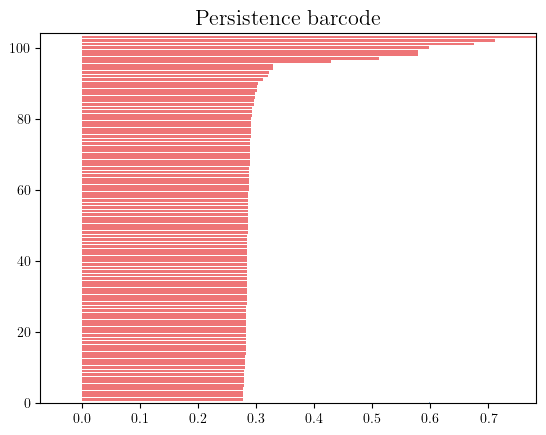

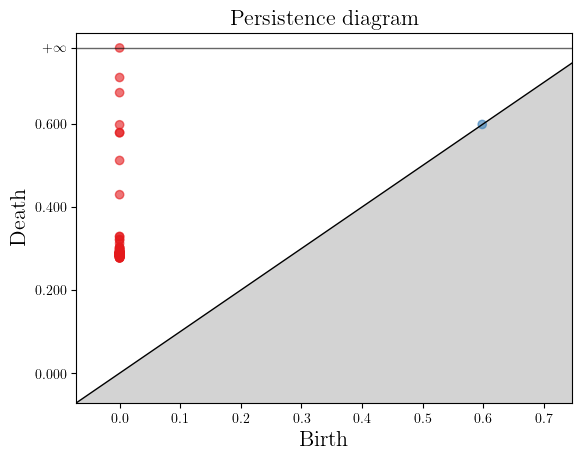

In [17]:
rips_complex = gd.RipsComplex(distance_matrix=X)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
diagram = simplex_tree.persistence()

gd.plot_persistence_barcode(diagram)
gd.plot_persistence_diagram(diagram)
plt.show()

In [18]:
simplex_tree.betti_numbers()

[1, 0]

In [19]:
simplex_tree.persistence_intervals_in_dimension(1)

array([[0.59829836, 0.59863868]])

In [20]:
simplex_tree.persistent_betti_numbers(from_value=0.59829836, to_value=0.59863868)

[3, 1]

In [ ]:
filtration_target = None
for simplex, filtration in simplex_tree.get_filtration():
    if filtration >= 0.04135723 and filtration <= .04630117:
        filtration_target = filtration
        break

for simplex, filtration in simplex_tree.get_filtration():
    if filtration == filtration_target:
        print(simplex)

In [27]:
mds = MDS(n_components=2, dissimilarity='precomputed')
mds_embeddings = mds.fit_transform(X)
print(mds_embeddings[:5])

[[-0.4573717   0.40922601]
 [-0.36063604  0.3074006 ]
 [-0.38518488  0.28904675]
 [-0.33644243  0.3226357 ]
 [ 0.4285273  -0.18219399]]


/usr/local/lib/python3.9/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


/var/folders/vp/7cb3bs4171vd6ywq0xgznpbh0000gn/T/ipykernel_3078/3241110911.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


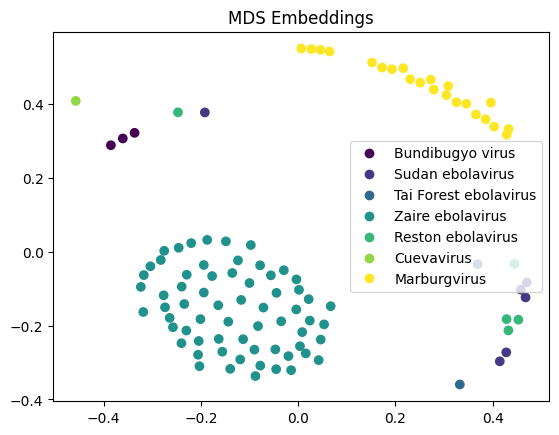

In [28]:
fig = plt.figure()
ax = fig.add_subplot()
scatter = ax.scatter(mds_embeddings[:,0], mds_embeddings[:,1], c=ebola_genome_lab_data.to_numpy())
ax.legend(handles=scatter.legend_elements()[0], labels=virus_display)
ax.set_title("MDS Embeddings")
fig.show()

In [73]:
alpha_complex = gd.AlphaComplex(points=tsne_embeddings)
simplex_tree = alpha_complex.create_simplex_tree()

In [74]:
points = np.array([alpha_complex.get_point(i) for i in range(simplex_tree.num_vertices())])

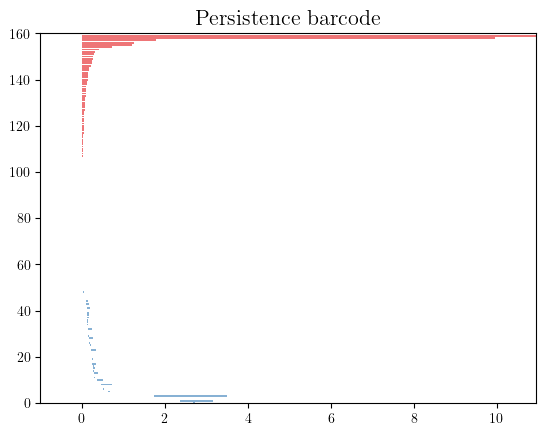

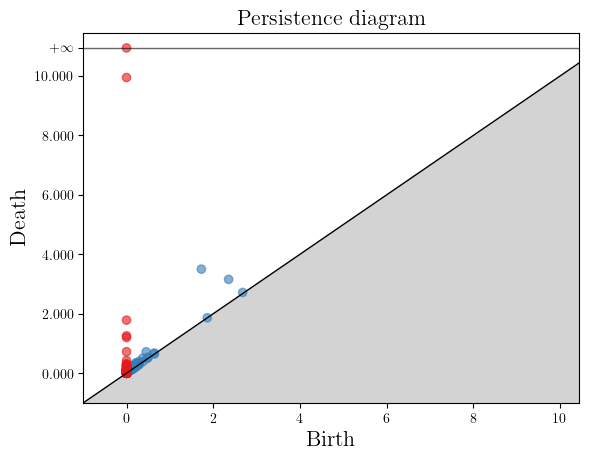

In [75]:
diagram = simplex_tree.persistence()

gd.plot_persistence_barcode(diagram)
gd.plot_persistence_diagram(diagram)
plt.show()

In [76]:
simplex_tree.persistence_intervals_in_dimension(1)

array([[2.07922568e-08, 2.18049859e-08],
       [2.63985456e-07, 2.70145453e-07],
       [3.00284185e-07, 3.02951275e-07],
       [3.19877983e-05, 3.27797093e-05],
       [2.52884071e-03, 2.53259890e-03],
       [3.07922664e-03, 3.08032191e-03],
       [3.26638729e-03, 3.26642229e-03],
       [3.40276406e-02, 3.43568823e-02],
       [3.68331033e-02, 4.43662148e-02],
       [4.77491368e-02, 5.32874639e-02],
       [7.02729728e-02, 7.31431397e-02],
       [7.96077700e-02, 8.36761353e-02],
       [1.22805219e-01, 1.27315593e-01],
       [1.16959975e-01, 1.32624167e-01],
       [1.35512039e-01, 1.38174925e-01],
       [1.36656549e-01, 1.38973013e-01],
       [1.39668889e-01, 1.40167045e-01],
       [1.36360132e-01, 1.44911748e-01],
       [1.46048552e-01, 1.46233066e-01],
       [1.09211696e-01, 1.51618249e-01],
       [1.46296114e-01, 1.54219283e-01],
       [1.60708424e-01, 1.62756954e-01],
       [1.33273434e-01, 1.63009940e-01],
       [1.29223524e-01, 1.67941900e-01],
       [1.104565

In [62]:
simplex_tree.betti_numbers()

[1, 0]

In [67]:
simplex_tree.persistent_betti_numbers(from_value=12.3, to_value=12.4)

[1, 1]

In [68]:
triangles = np.array([s[0] for s in simplex_tree.get_skeleton(2) if len(s[0])==3 and s[1] <= 12.4])
triangles

array([[  0,   1,   2],
       [  0,   1,  10],
       [  0,   2,  15],
       [  0,   9,  12],
       [  0,   9,  16],
       [  0,  10,  12],
       [  0,  15,  16],
       [  1,   2,   3],
       [  1,   3,  81],
       [  2,   3,  15],
       [  3,  15,  74],
       [  3,  74,  75],
       [  4,   5,   6],
       [  4,   5,   7],
       [  4,   6,   7],
       [  5,   6,  77],
       [  5,   7,   9],
       [  5,   9,  16],
       [  5,  16,  77],
       [  6,   7,   8],
       [  6,   8,  77],
       [  7,   8,   9],
       [  8,   9,  11],
       [  8,  19,  77],
       [  9,  11,  12],
       [ 10,  12,  13],
       [ 10,  13,  14],
       [ 11,  12,  13],
       [ 11,  13,  14],
       [ 15,  16,  74],
       [ 16,  48,  53],
       [ 16,  48,  77],
       [ 16,  53,  74],
       [ 17,  24,  34],
       [ 17,  24,  39],
       [ 17,  25,  33],
       [ 17,  25,  34],
       [ 17,  30,  33],
       [ 17,  30,  42],
       [ 17,  39,  43],
       [ 17,  42,  43],
       [ 18,  20

In [28]:
import networkx as nx
import itertools

def draw_2d_simplicial_complex(simplices, pos=None, return_pos=False, ax = None):
    """
    Draw a simplicial complex up to dimension 2 from a list of simplices, as in [1].
        
        Args
        ----
        simplices: list of lists of integers
            List of simplices to draw. Sub-simplices are not needed (only maximal).
            For example, the 2-simplex [1,2,3] will automatically generate the three
            1-simplices [1,2],[2,3],[1,3] and the three 0-simplices [1],[2],[3].
            When a higher order simplex is entered only its sub-simplices
            up to D=2 will be drawn.
        
        pos: dict (default=None)
            If passed, this dictionary of positions d:(x,y) is used for placing the 0-simplices.
            The standard nx spring layour is used otherwise.
           
        ax: matplotlib.pyplot.axes (default=None)
        
        return_pos: dict (default=False)
            If True returns the dictionary of positions for the 0-simplices.
            
        References
        ----------    
        .. [1] I. Iacopini, G. Petri, A. Barrat & V. Latora (2019)
               "Simplicial Models of Social Contagion".
               Nature communications, 10(1), 2485.
    """

    
    #List of 0-simplices
    nodes =list(set(itertools.chain(*simplices)))
    
    #List of 1-simplices
    edges = list(set(itertools.chain(*[[tuple(sorted((i, j))) for i, j in itertools.combinations(simplex, 2)] for simplex in simplices])))

    #List of 2-simplices
    triangles = list(set(itertools.chain(*[[tuple(sorted((i, j, k))) for i, j, k in itertools.combinations(simplex, 3)] for simplex in simplices])))
    
    if ax is None: ax = plt.gca()
    ax.set_xlim([-1.1, 1.1])      
    ax.set_ylim([-1.1, 1.1])
    ax.get_xaxis().set_ticks([])  
    ax.get_yaxis().set_ticks([])
    ax.axis('off')
       
    if pos is None:
        # Creating a networkx Graph from the edgelist
        G = nx.Graph()
        G.add_edges_from(edges)
        # Creating a dictionary for the position of the nodes
        pos = nx.spring_layout(G)
        
    # Drawing the edges
    for i, j in edges:
        (x0, y0) = pos[i]
        (x1, y1) = pos[j]
        line = plt.Line2D([ x0, x1 ], [y0, y1 ],color = 'black', zorder = 1, lw=0.7)
        ax.add_line(line);
    
    # Filling in the triangles
    for i, j, k in triangles:
        (x0, y0) = pos[i]
        (x1, y1) = pos[j]
        (x2, y2) = pos[k]
        tri = plt.Polygon([ [ x0, y0 ], [ x1, y1 ], [ x2, y2 ] ],
                          edgecolor = 'black', facecolor = plt.cm.Blues(0.6),
                          zorder = 2, alpha=0.4, lw=0.5)
        ax.add_patch(tri);

    # Drawing the nodes 
    for i in nodes:
        (x, y) = pos[i]
        circ = plt.Circle([ x, y ], radius = 0.02, zorder = 3, lw=0.5,
                          edgecolor = 'Black', facecolor = u'#ff7f0e')
        ax.add_patch(circ);

    if return_pos: return pos

/var/folders/vp/7cb3bs4171vd6ywq0xgznpbh0000gn/T/ipykernel_51211/613329327.py:8: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



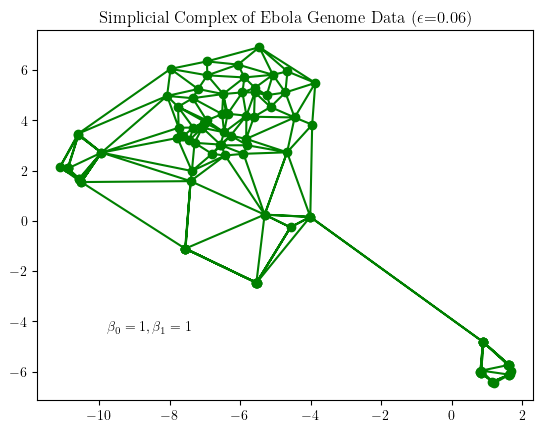

In [70]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.gca()
ax.triplot(points[:,0], points[:,1], triangles, 'go-')
ax.set_title("Simplicial Complex of Ebola Genome Data ($\epsilon$=0.06)")
ax.annotate(r"$\beta_0=1,\beta_1=1$", xy=(50,50), xycoords='axes points')
fig.show()

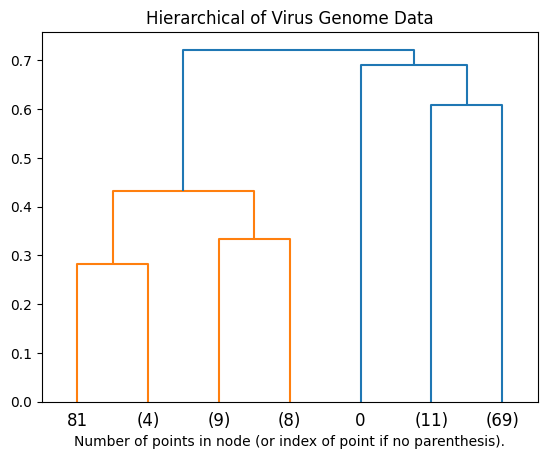

In [22]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, metric='precomputed', linkage='average')
model = model.fit(X)
plt.title("Hierarchical Clustering of Virus Genome Data")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=2)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()